# Task 1 - Exploratory Data Analysis (EDA)

##  Loading the Data

In [1]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows
print(customers.head())
print(products.head())
print(transactions.head())


C:\Users\dorad\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Basic Data Exploration

## Exploring the Structure and Missing Values


In [5]:
# Basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

1) To Check the structure, data types, and missing values.

2) To Summarize the numerical and categorical data

# Merging the Datasets for deeper analysis.

In [6]:
# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Display the first few rows of the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())



Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

## Performing EDA to Visualize and analyze key trends in the data.

1. Distribution of Sales Across Regions

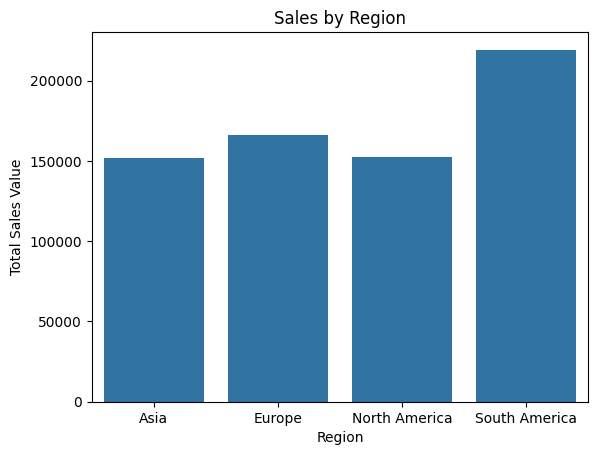

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

# Plot
sns.barplot(data=region_sales, x='Region', y='TotalValue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.show()


Explanation:
I analyzed sales distribution across regions to identify high-performing markets. A bar chart was created to visualize total sales in each region.

2. Most Popular Product Categories

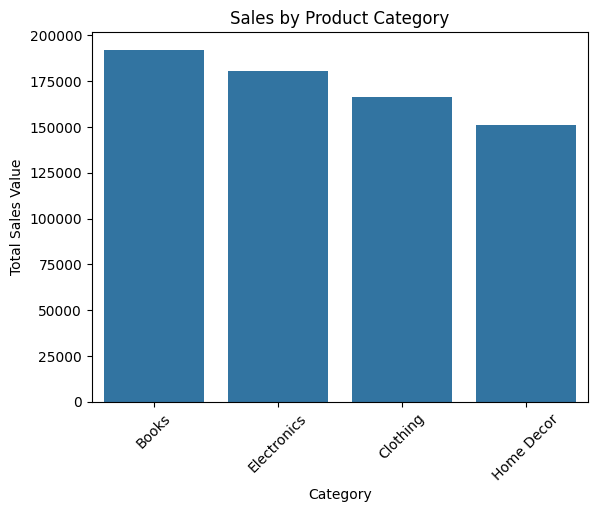

In [8]:
# Total sales by category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()

# Plot
sns.barplot(data=category_sales, x='Category', y='TotalValue', order=category_sales.sort_values('TotalValue', ascending=False)['Category'])
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


Explanation:
To determine customer preferences, I analyzed product categories with the highest sales. This insight can help focus marketing efforts on popular categories.

3. Customer Signup Trends

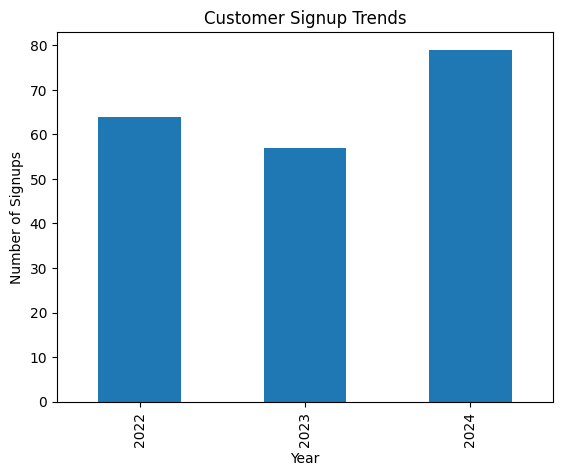

In [9]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Signup trends by year
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()

# Plot
signup_trends.plot(kind='bar', title='Customer Signup Trends', xlabel='Year', ylabel='Number of Signups')
plt.show()


In [ ]:
Explanation:
I examined customer signup trends over the years to understand user acquisition patterns. This information is valuable for assessing growth.